In [13]:
from random import randrange
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [15]:
class lista_circular:
    def __init__(self):
        self.lista   = []
        self.indice  = 0

    def add(self, e):
        self.lista.append(e)
    
    def __getitem__(self, idx):
        return self.lista[idx]

    def __setitem__(self, idx, val):
        self.lista[idx] = val

    def __len__(self):
        return len(self.lista)

    def acessar_proximo(self):
        e           = self.lista[self.indice]
        self.indice = (self.indice + 1) % len(self.lista)
        return e

In [16]:
n = 10

## ESSA LISTA GUARDA O GRAFO
list_adj = [[] for i in range(n)]

## GERA O GRAFO COMPLETO QUE SERÁ USADO NO HILL CLIMBING
for i in range(n):
    for j in range(i, n):
        if i != j:
            list_adj[i].append((j, randrange(3000)))
            list_adj[j].append((i, randrange(3000)))

## FUNÇÃO PRA DEBUG, SERVE PRA MOSTRAR O GRAFO COMPLETO
def printar_grafo():
    for i in range(n):
        print(i, list_adj[i])

# GERA O CAMINHO ALEATÓRIO INICIAL
def gerar_caminho_inicial():
    index    = [i for i in range(n)]
    vertices = lista_circular()

    # ESSA FUNÇÃO BASICAMENTE CRIA UM VETOR DE INDICES E EMBARALHA OS INDICES

    for i in range(n):
        ridx = randrange(n-i)
        vertices.add(index[ridx])
        index.remove(index[ridx])

    return vertices

# CALCULA O CUSTO DE UM DADO CAMINHO
def calcular_custo(vertices):
    custo = 0
    # APENAS SOMO O PESO DE CADA ARESTA E RETORNO NO FINAL
    for i in range(len(vertices)):
        custo = custo + list_adj[vertices[i]][[x for x in range(n-1) if list_adj[vertices[i]][x][0] == vertices[(i+1) % n]][0]][1]
    return custo

# FUNÇÃO PRA DEBUG, SERVE PRA PRINTAR UM DADO CAMINHO
def print_list(lista):
    for i in range(len(lista)):
        print(lista[i], end=' ')

def gerar_lista_grafo(vertices):
    gra = []

    n = len(vertices)

    for i in range(len(vertices)):
        gra.append([vertices[i], vertices[(i+1)%n]])
    
    return gra


In [134]:
# HILL CLIMBING EM QUESTÃO, IMPLEMENTADO DE ACORDO, TROCANDO OS VIZINHOS, E CHECANDO SE HÁ ALGUM MELHOR QUE
# A MELHOR RESPOSTA ATUAL.. SE NÃO HOUVER, EU PARO.
def hill_climbing(vertices):
    # GUARDA O MELHOR ESTADO ATUAL
    melhor_estado = [vertices[x] for x in range(len(vertices))]
    melhor_custo  = 100000000

    para_hill_climbing = 1
    while para_hill_climbing == 1:
        para_hill_climbing = 0
        # PRA CADA ITERAÇÃO AQUI EU GERO UM NOVO CAMINHO E VERIFICO SEU CUSTO
        for i in range(0, n-1, 2):
            vertices[i], vertices[i+1] = vertices[i+1], vertices[i]
        
            aux = calcular_custo(vertices)

            temp_cam = [vertices[x] for x in range(len(vertices))]

            print("caminho:", temp_cam, end='')
            print(" custo: ", aux)

            desenhar_grafo(temp_cam + [temp_cam[0]])

            if melhor_custo > aux:
                para_hill_climbing = 1 # ESSA VARIAVEL SERVE PARA VERIFICAR SE HOUVE ALGUMA MELHORIA NO RESULTADO APOS AS TROCAS
                melhor_custo  = aux
                melhor_estado = [vertices[x] for x in range(len(vertices))]
    
    # RETORNA O MELHOR CUSTO OBTIDO PELO ALGORITMO E O ESTADO DO CAMINHO CORRESPONDENTE
    return [melhor_custo, melhor_estado]

In [137]:
def tempera_simulada(vertices, T, T_final, fator_decaimento):
    # GERA UM ESTADO INICIAL ALEATÓRIO
    custo_atual       = 2**32

    # CALCULA O CUSTO ATUAL
    melhor_custo      = calcular_custo(vertices)

    # SALVA O ESTADO ATUAL
    estado            = [vertices[x] for x in range(len(vertices))]

    while True:
        # FATOR DE DECAIMENTO CONSTANTE
        T = T * fator_decaimento
        
        # CONDIÇÃO DE PARADA
        if T <= T_final:
            return [melhor_custo, estado]

        # GERANDO UM ÍNDICE ALEATÓRIO
        idx = randrange(n-1)

        # TROCANDO OS VIZINHOS
        vertices[idx], vertices[idx+1] = vertices[idx+1], vertices[idx]

        # RECALCULANDO O CUSTO

        # CALCULA O CUSTO APÓS A TROCA
        custo_atual = calcular_custo(vertices)

        temp_cam = [vertices[x] for x in range(len(vertices))]

        print("caminho:", temp_cam, end='')
        print(" custo: ", custo_atual)

        desenhar_grafo(temp_cam + [temp_cam[0]])

        # CALCULA A DIFERENÇA DO MELHOR CUSTO E DO CUSTO ATUAL
        E = custo_atual - melhor_custo

        # SE A DIFERENÇA FOR NEGATIVA, QUER DIZER QUE O CUSTO ATUAL É MELHOR QUE O MELHOR CUSTO CORRENTE
        if E < 0:
            melhor_custo = custo_atual
            estado       = [vertices[x] for x in range(len(vertices))]
        elif math.exp(-E / T) > random.random(): # SENÃO, EU PEGO MESMO, AINDA ASSIM, O CUSTO ATUAL, DEPENDENDO DE UMA CERTA PROBABILIDADE
            melhor_custo = custo_atual
            estado       = [vertices[x] for x in range(len(vertices))]

In [123]:
vertices = gerar_caminho_inicial()

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

y_axis = []

for i in range(n):
    y_axis.append(2 + randrange(2*n-2))

def desenhar_grafo(vertices):
    plt.axis([0, 2*n, 0, 2*n])

    for i in range(n):
        plt.plot(5+vertices[i], y_axis[i], 'ro')
        plt.plot([5+vertices[i], 5+vertices[(i+1)%n]], [y_axis[i], y_axis[(i+1)%n]],'b-')
    plt.show()

caminho: [9, 0, 4, 8, 3, 6, 7, 1, 5, 2] custo:  16744


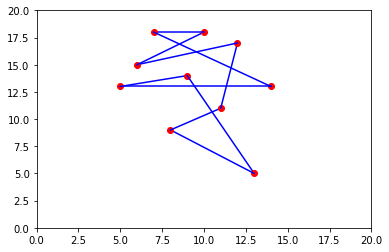

caminho: [9, 0, 8, 4, 3, 6, 7, 1, 5, 2] custo:  13102


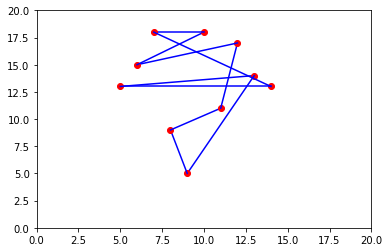

caminho: [9, 0, 8, 4, 6, 3, 7, 1, 5, 2] custo:  12998


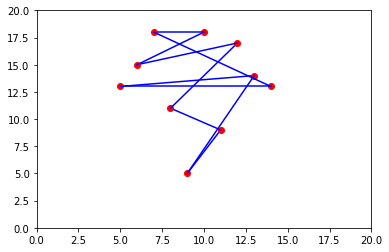

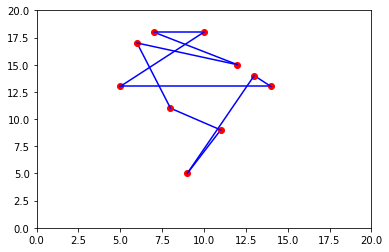

caminho: [0, 9, 4, 8, 6, 3, 1, 7, 2, 5] custo:  15267


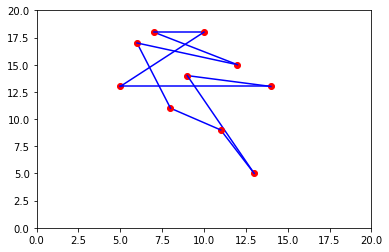

caminho: [0, 9, 4, 8, 3, 6, 1, 7, 2, 5] custo:  15256


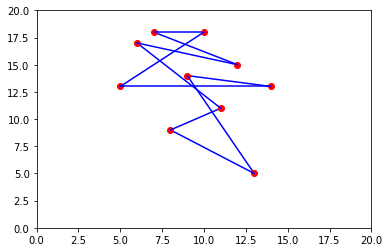

caminho: [0, 9, 4, 8, 3, 6, 7, 1, 2, 5] custo:  14993


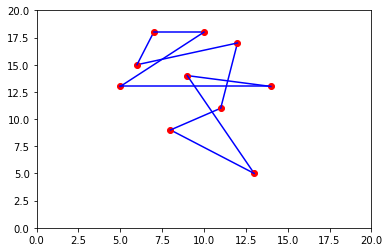

caminho: [0, 9, 4, 8, 3, 6, 7, 1, 5, 2] custo:  14674


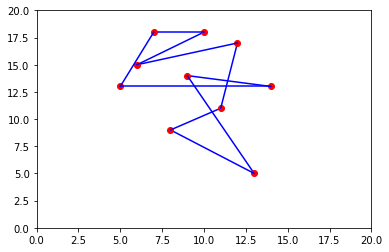


Estado final do caminho: 9 0 8 4 6 3 7 1 5 2 

Menor caminho obtido com SUBIDA DE ENCOSTA:  12998


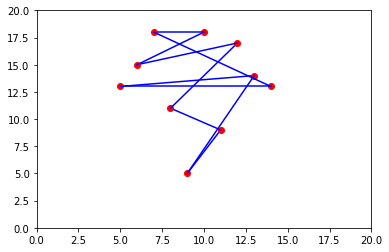

In [139]:
v_temp = [vertices[x] for x in range(len(vertices))]

res = hill_climbing(v_temp)

print("\nEstado final do caminho: ", end='')
print_list(res[1])

print('\n')

print("Menor caminho obtido com SUBIDA DE ENCOSTA: ", res[0])

desenhar_grafo(res[1])

In [ ]:
res = tempera_simulada(vertices, 1, 0.1, 0.99)

print("\nEstado final do caminho: ", end='')
print_list(res[1])

print('\n')

print("Menor caminho obtido com TEMPERA SIMULADA: ", res[0])